In [ ]:
import pandas as pd
import numpy as np
x_dense=pd.read_csv('/content/drive/MyDrive/IDB/data_densenet121.csv')
x_res=pd.read_csv('/content/drive/MyDrive/IDB/data_resnet.csv')
x_incep=pd.read_csv('/content/drive/MyDrive/IDB/data_incep.csv')
x_xcep=pd.read_csv('/content/drive/MyDrive/IDB/data_xcep.csv')
#x_mobile=pd.read_csv('data_mobile.csv')
x_vgg19=pd.read_csv('/content/drive/MyDrive/IDB/data_vgg19.csv')
x_label=pd.read_csv('/content/drive/MyDrive/IDB/target.csv')
print(x_dense.shape)
print(x_res.shape)
print(x_incep.shape)
print(x_xcep.shape)
#print(x_mobile.shape)
print(x_vgg19.shape)
print(x_label.shape)
x_label=np.squeeze(x_label,axis=1)
print(x_label.shape)

(1483, 1024)
(1483, 2048)
(1483, 2048)
(1483, 2048)
(1483, 512)
(1483, 1)
(1483,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_new=np.concatenate((x_dense,x_res,x_incep,x_xcep),axis=1)
x_new.shape

(1483, 7168)

In [ ]:
X=x_dense
y=x_label

In [ ]:
########### train_test_split
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=0)

In [ ]:
x_train.shape

(1186, 1024)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
 # defining parameter range
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000],
              'penalty': ['l1','l2'],
              'solver':['lbfgs', 'liblinear', 'sag', 'saga']}
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,cv=5)
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.840 total time=   0.1s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.835 total time=   0.1s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.886 total time=   0.1s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.827 total time=   0.1s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.806 total time=   0.1s
[CV 1/5] END ......C=0.01, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ......C=0.01, penalty=l1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.840 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.835 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.886 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.827 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.806 total time=   1.4s
[CV 1/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.895 total time=   0.1s
[CV 2/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.903 total time=   0.2s
[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.941 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.932 total time=   0.2s
[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.941 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.895 total time=   0.2s
[CV 2/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.903 total time=   0.2s
[CV 3/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.941 total time=   0.2s
[CV 4/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.932 total time=   0.2s
[CV 5/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.937 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.895 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.907 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.941 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.932 total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.941 total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.891 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.903 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.937 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.928 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.937 total time=   1.2s
[CV 1/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.882 total time=   0.2s
[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.890 total time=   0.2s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.924 total time=   0.2s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.903 total time=   0.2s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.907 total time=   0.2s
[CV 1/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .......C=0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.882 total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.895 total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.928 total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.903 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.899 total time=   1.5s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.916 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.911 total time=   0.2s
[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.941 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.911 total time=   0.2s
[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.945 total time=   0.2s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.916 total time=   0.3s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.911 total time=   0.3s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.941 total time=   0.3s
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.911 total time=   0.3s
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.945 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.899 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.916 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.941 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.928 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.949 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.891 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.907 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.924 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.932 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.941 total time=   1.2s
[CV 1/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.887 total time=   0.5s
[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.941 total time=   0.4s
[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.924 total time=   0.4s
[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.911 total time=   0.3s
[CV 5/5] END .C=1, penalty=l1, solver=liblinear;, score=0.932 total time=   0.3s
[CV 1/5] END .........C=1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .........C=1, p

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ......C=1, penalty=l1, solver=saga;, score=0.891 total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ......C=1, penalty=l1, solver=saga;, score=0.911 total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ......C=1, penalty=l1, solver=saga;, score=0.928 total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ......C=1, penalty=l1, solver=saga;, score=0.928 total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END ......C=1, penalty=l1, solver=saga;, score=0.941 total time=   1.6s
[CV 1/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.912 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 2/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.924 total time=   0.2s
[CV 3/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.945 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 4/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.916 total time=   0.2s
[CV 5/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.937 total time=   0.2s
[CV 1/5] END .C=1, penalty=l2, solver=liblinear;, score=0.920 total time=   0.3s
[CV 2/5] END .C=1, penalty=l2, solver=liblinear;, score=0.920 total time=   0.3s
[CV 3/5] END .C=1, penalty=l2, solver=liblinear;, score=0.941 total time=   0.3s
[CV 4/5] END .C=1, penalty=l2, solver=liblinear;, score=0.924 total time=   0.3s
[CV 5/5] END .C=1, penalty=l2, solver=liblinear;, score=0.937 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .......C=1, penalty=l2, solver=sag;, score=0.903 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .......C=1, penalty=l2, solver=sag;, score=0.920 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .......C=1, penalty=l2, solver=sag;, score=0.937 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .......C=1, penalty=l2, solver=sag;, score=0.932 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .......C=1, penalty=l2, solver=sag;, score=0.945 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ......C=1, penalty=l2, solver=saga;, score=0.891 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ......C=1, penalty=l2, solver=saga;, score=0.907 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ......C=1, penalty=l2, solver=saga;, score=0.928 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ......C=1, penalty=l2, solver=saga;, score=0.937 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ......C=1, penalty=l2, solver=saga;, score=0.941 total time=   1.1s
[CV 1/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.899 total time=   0.5s
[CV 2/5] END C=10, penalty=l1, solver=liblinear;, score=0.945 total time=   0.3s
[CV 3/5] END C=10, penalty=l1, solver=liblinear;, score=0.928 total time=   0.5s
[CV 4/5] END C=10, penalty=l1, solver=liblinear;, score=0.907 total time=   0.4s
[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.941 total time=   0.3s
[CV 1/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ........C=10, p

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.891 total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .....C=10, penalty=l1, solver=saga;, score=0.907 total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .....C=10, penalty=l1, solver=saga;, score=0.928 total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .....C=10, penalty=l1, solver=saga;, score=0.937 total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.941 total time=   1.7s
[CV 1/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.912 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 2/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.916 total time=   0.2s
[CV 3/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.941 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 4/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.911 total time=   0.2s
[CV 5/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.937 total time=   0.2s
[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.916 total time=   0.3s
[CV 2/5] END C=10, penalty=l2, solver=liblinear;, score=0.920 total time=   0.3s
[CV 3/5] END C=10, penalty=l2, solver=liblinear;, score=0.941 total time=   0.3s
[CV 4/5] END C=10, penalty=l2, solver=liblinear;, score=0.924 total time=   0.3s
[CV 5/5] END C=10, penalty=l2, solver=liblinear;, score=0.932 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ......C=10, penalty=l2, solver=sag;, score=0.903 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ......C=10, penalty=l2, solver=sag;, score=0.916 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ......C=10, penalty=l2, solver=sag;, score=0.932 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ......C=10, penalty=l2, solver=sag;, score=0.932 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ......C=10, penalty=l2, solver=sag;, score=0.945 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .....C=10, penalty=l2, solver=saga;, score=0.891 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .....C=10, penalty=l2, solver=saga;, score=0.907 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .....C=10, penalty=l2, solver=saga;, score=0.928 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .....C=10, penalty=l2, solver=saga;, score=0.937 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .....C=10, penalty=l2, solver=saga;, score=0.941 total time=   1.2s
[CV 1/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.912 total time=   0.2s
[CV 2/5] END C=100, penalty=l1, solver=liblinear;, score=0.916 total time=   0.2s
[CV 3/5] END C=100, penalty=l1, solver=liblinear;, score=0.911 total time=   0.2s
[CV 4/5] END C=100, penalty=l1, solver=liblinear;, score=0.899 total time=   0.2s
[CV 5/5] END C=100, penalty=l1, solver=liblinear;, score=0.920 total time=   0.2s
[CV 1/5] END .......C=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .......C=1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=100, penalty=l1, solver=saga;, score=0.891 total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=100, penalty=l1, solver=saga;, score=0.907 total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=100, penalty=l1, solver=saga;, score=0.928 total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=100, penalty=l1, solver=saga;, score=0.932 total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.945 total time=   1.8s
[CV 1/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.908 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 2/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.924 total time=   0.2s
[CV 3/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.937 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 4/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.907 total time=   0.2s
[CV 5/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.941 total time=   0.2s
[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.916 total time=   0.3s
[CV 2/5] END C=100, penalty=l2, solver=liblinear;, score=0.920 total time=   0.3s
[CV 3/5] END C=100, penalty=l2, solver=liblinear;, score=0.945 total time=   0.3s
[CV 4/5] END C=100, penalty=l2, solver=liblinear;, score=0.924 total time=   0.3s
[CV 5/5] END C=100, penalty=l2, solver=liblinear;, score=0.932 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .....C=100, penalty=l2, solver=sag;, score=0.903 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .....C=100, penalty=l2, solver=sag;, score=0.920 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .....C=100, penalty=l2, solver=sag;, score=0.937 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .....C=100, penalty=l2, solver=sag;, score=0.932 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .....C=100, penalty=l2, solver=sag;, score=0.945 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=100, penalty=l2, solver=saga;, score=0.891 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=100, penalty=l2, solver=saga;, score=0.907 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=100, penalty=l2, solver=saga;, score=0.928 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=100, penalty=l2, solver=saga;, score=0.932 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ....C=100, penalty=l2, solver=saga;, score=0.941 total time=   1.2s
[CV 1/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000, penalty=l1, solver=liblinear;, score=0.899 total time=   0.1s
[CV 2/5] END C=1000, penalty=l1, solver=liblinear;, score=0.899 total time=   0.2s
[CV 3/5] END C=1000, penalty=l1, solver=liblinear;, score=0.932 total time=   0.2s
[CV 4/5] END C=1000, penalty=l1, solver=liblinear;, score=0.916 total time=   0.2s
[CV 5/5] END C=1000, penalty=l1, solver=liblinear;, score=0.911 total time=   0.1s
[CV 1/5] END ......C=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .....

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ...C=1000, penalty=l1, solver=saga;, score=0.891 total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ...C=1000, penalty=l1, solver=saga;, score=0.907 total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ...C=1000, penalty=l1, solver=saga;, score=0.928 total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ...C=1000, penalty=l1, solver=saga;, score=0.932 total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END ...C=1000, penalty=l1, solver=saga;, score=0.941 total time=   1.9s
[CV 1/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.903 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 2/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.2s
[CV 3/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.941 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 4/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.903 total time=   0.2s
[CV 5/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.941 total time=   0.2s
[CV 1/5] END C=1000, penalty=l2, solver=liblinear;, score=0.920 total time=   0.6s
[CV 2/5] END C=1000, penalty=l2, solver=liblinear;, score=0.928 total time=   0.4s
[CV 3/5] END C=1000, penalty=l2, solver=liblinear;, score=0.945 total time=   0.5s
[CV 4/5] END C=1000, penalty=l2, solver=liblinear;, score=0.916 total time=   0.5s
[CV 5/5] END C=1000, penalty=l2, solver=liblinear;, score=0.937 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=1000, penalty=l2, solver=sag;, score=0.895 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=1000, penalty=l2, solver=sag;, score=0.916 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=1000, penalty=l2, solver=sag;, score=0.932 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=1000, penalty=l2, solver=sag;, score=0.928 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ....C=1000, penalty=l2, solver=sag;, score=0.945 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ...C=1000, penalty=l2, solver=saga;, score=0.891 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ...C=1000, penalty=l2, solver=saga;, score=0.911 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ...C=1000, penalty=l2, solver=saga;, score=0.928 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ...C=1000, penalty=l2, solver=saga;, score=0.937 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solve

[CV 5/5] END ...C=1000, penalty=l2, solver=saga;, score=0.945 total time=   1.2s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
clf_lr=grid.best_estimator_

{'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1000, solver='liblinear')


In [ ]:
clf_lr.fit(x_train,y_train)
y_pred=clf_lr.predict(x_test)
from sklearn.metrics import classification_report
cpr=classification_report(y_test,y_pred)
print(cpr)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       139
           1       0.93      0.94      0.93       158

    accuracy                           0.93       297
   macro avg       0.93      0.93      0.93       297
weighted avg       0.93      0.93      0.93       297



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
acc=accuracy_score(y_pred,y_test)
print('%.2f'%(acc*100))
pre=precision_score(y_pred,y_test)
print('%.2f'%(pre*100))
rec=recall_score(y_pred,y_test)
print('%.2f'%(rec*100))
f1=f1_score(y_pred,y_test)
print('%.2f'%(f1*100))

92.59
93.67
92.50
93.08


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
 # defining parameter range
param_grid = {'n_neighbors': [ 1,3,5,7,10,15,20],
              'p': [1,2,3]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3,cv=5)
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END ................n_neighbors=1, p=1;, score=0.894 total time=   1.0s
[CV 2/5] END ................n_neighbors=1, p=1;, score=0.909 total time=   1.0s
[CV 3/5] END ................n_neighbors=1, p=1;, score=0.885 total time=   1.0s
[CV 4/5] END ................n_neighbors=1, p=1;, score=0.947 total time=   0.9s
[CV 5/5] END ................n_neighbors=1, p=1;, score=0.894 total time=   1.0s
[CV 1/5] END ................n_neighbors=1, p=2;, score=0.880 total time=   0.1s
[CV 2/5] END ................n_neighbors=1, p=2;, score=0.894 total time=   0.1s
[CV 3/5] END ................n_neighbors=1, p=2;, score=0.875 total time=   0.1s
[CV 4/5] END ................n_neighbors=1, p=2;, score=0.923 total time=   0.1s
[CV 5/5] END ................n_neighbors=1, p=2;, score=0.894 total time=   0.1s
[CV 1/5] END ................n_neighbors=1, p=3;, score=0.880 total time=  38.0s
[CV 2/5] END ................n_neighbors=1, p=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 10, 15, 20],
                         'p': [1, 2, 3]},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
clf_kn=grid.best_estimator_

{'n_neighbors': 5, 'p': 2}
KNeighborsClassifier()


In [ ]:
clf_kn.fit(x_train,y_train)
y_pred=clf_kn.predict(x_test)
from sklearn.metrics import classification_report
cpr=classification_report(y_test,y_pred)
print(cpr)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       206
           1       0.89      0.92      0.90       239

    accuracy                           0.89       445
   macro avg       0.89      0.89      0.89       445
weighted avg       0.89      0.89      0.89       445



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
acc=accuracy_score(y_pred,y_test)
print('%.2f'%(acc*100))
pre=precision_score(y_pred,y_test)
print('%.2f'%(pre*100))
rec=recall_score(y_pred,y_test)
print('%.2f'%(rec*100))
f1=f1_score(y_pred,y_test)
print('%.2f'%(f1*100))

89.21
91.63
88.66
90.12


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
 # defining parameter range
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000],
              'gamma': [1000,100,10,1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=5)
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END ....C=0.01, gamma=1000, kernel=rbf;, score=0.519 total time=   4.0s
[CV 2/5] END ....C=0.01, gamma=1000, kernel=rbf;, score=0.519 total time=   4.0s
[CV 3/5] END ....C=0.01, gamma=1000, kernel=rbf;, score=0.519 total time=   4.0s
[CV 4/5] END ....C=0.01, gamma=1000, kernel=rbf;, score=0.522 total time=   4.0s
[CV 5/5] END ....C=0.01, gamma=1000, kernel=rbf;, score=0.517 total time=   4.0s
[CV 1/5] END .C=0.01, gamma=1000, kernel=linear;, score=0.899 total time=   1.0s
[CV 2/5] END .C=0.01, gamma=1000, kernel=linear;, score=0.913 total time=   1.0s
[CV 3/5] END .C=0.01, gamma=1000, kernel=linear;, score=0.918 total time=   1.1s
[CV 4/5] END .C=0.01, gamma=1000, kernel=linear;, score=0.928 total time=   1.1s
[CV 5/5] END .C=0.01, gamma=1000, kernel=linear;, score=0.937 total time=   1.1s
[CV 1/5] END .....C=0.01, gamma=100, kernel=rbf;, score=0.519 total time=   4.0s
[CV 2/5] END .....C=0.01, gamma=100, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
clf=grid.best_estimator_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.0001)


In [ ]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import classification_report
cpr=classification_report(y_test,y_pred)
print(cpr)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       206
           1       0.94      0.95      0.94       239

    accuracy                           0.94       445
   macro avg       0.94      0.94      0.94       445
weighted avg       0.94      0.94      0.94       445



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
acc=accuracy_score(y_pred,y_test)
print('%.2f'%(acc*100))
pre=precision_score(y_pred,y_test)
print('%.2f'%(pre*100))
rec=recall_score(y_pred,y_test)
print('%.2f'%(rec*100))
f1=f1_score(y_pred,y_test)
print('%.2f'%(f1*100))

93.93
94.56
94.17
94.36


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
 # defining parameter range
param_grid = tree_para = {'criterion':['gini','entropy'],
                          'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,cv=5)
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.774 total time=   0.7s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.736 total time=   0.7s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.774 total time=   0.7s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.821 total time=   0.7s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.826 total time=   0.7s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.755 total time=   0.9s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.784 total time=   0.8s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.764 total time=   0.9s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.802 total time=   0.8s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.812 total time=   0.8s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.769 total time=   1.0s
[CV 2/5] END .......criterion=gini, max_depth=6

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
clf_dt=grid.best_estimator_

{'criterion': 'entropy', 'max_depth': 12}
DecisionTreeClassifier(criterion='entropy', max_depth=12)


In [ ]:
clf_dt.fit(x_train,y_train)
y_pred=clf_dt.predict(x_test)
from sklearn.metrics import classification_report
cpr=classification_report(y_test,y_pred)
print(cpr)

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       206
           1       0.81      0.76      0.78       239

    accuracy                           0.77       445
   macro avg       0.77      0.77      0.77       445
weighted avg       0.77      0.77      0.77       445



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
acc=accuracy_score(y_pred,y_test)
print('%.2f'%(acc*100))
pre=precision_score(y_pred,y_test)
print('%.2f'%(pre*100))
rec=recall_score(y_pred,y_test)
print('%.2f'%(rec*100))
f1=f1_score(y_pred,y_test)
print('%.2f'%(f1*100))

77.30
76.15
80.53
78.28


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
 # defining parameter range
param_grid = {
    'n_estimators': [50,100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,cv=5)
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50;, score=0.832 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50;, score=0.846 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50;, score=0.865 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50;, score=0.855 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50;, score=0.836 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.846 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.851 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.885 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=4, max_features

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
clf_rf=grid.best_estimator_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=200)


In [ ]:
clf_rf.fit(x_train,y_train)
y_pred=clf_rf.predict(x_test)
from sklearn.metrics import classification_report
cpr=classification_report(y_test,y_pred)
print(cpr)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       206
           1       0.89      0.89      0.89       239

    accuracy                           0.88       445
   macro avg       0.88      0.88      0.88       445
weighted avg       0.88      0.88      0.88       445



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
acc=accuracy_score(y_pred,y_test)
print('%.2f'%(acc*100))
pre=precision_score(y_pred,y_test)
print('%.2f'%(pre*100))
rec=recall_score(y_pred,y_test)
print('%.2f'%(rec*100))
f1=f1_score(y_pred,y_test)
print('%.2f'%(f1*100))

88.31
88.70
89.45
89.08


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

Text(0.5, 0.98, 'ROC curve comparison')

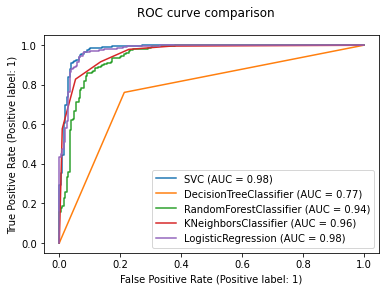

In [ ]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(clf, x_test, y_test)
dt_disp = plot_roc_curve(clf_dt, x_test, y_test, ax=svc_disp.ax_)
rf_disp = plot_roc_curve(clf_rf, x_test, y_test, ax=dt_disp.ax_)
rf_disp = plot_roc_curve(clf_kn, x_test, y_test, ax=dt_disp.ax_)
rf_disp = plot_roc_curve(clf_lr, x_test, y_test, ax=dt_disp.ax_)
rf_disp.figure_.suptitle("ROC curve comparison")